# MLDDS Practice Assessment (50 points)

(Rename this workbook with your name)

## Dataset

The dataset has been downloaded for you and split into 2 parts. 

#### Important: Please use the included .csv files (instead of downloading from UCI's webpage). You can still refer to the Data Description on the UCI webpage.

- training_data.csv: use for training and metrics (task 1 and 2)

- prediction_data.csv: use for prediction (task 3)

Data Description:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

## Tasks
1. Train classification models to predict whether a given breast cancer sample is malignant (M) or benign (B). [20 points]
  - Use data from training_data.csv for training.

2. Determine which model you selected performs the best: [20 points]
  - use classification_report
  - use confusion_matrix
  - plot the roc_curve and compute the area under the curve (auc)
  - state which model is the best performing one and why

3. Demonstrate how you will use the model in deployment [10 points]
  - Use data from prediction_data.csv
  - Get a prediction from your best model, print out the prediction (malignant or benign).

## Passing Requirements
- To pass the assessment, you should compare at least 3 types of models (there is no upper limit).
    - The model performance doesn't have to be the best possible, as long as you demonstrate how you compared them.
    - One of the models for comparison can be the DummyClassifier (if you choose to use it)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import seaborn as sns
from sklearn.metrics import auc, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

## Train Classification Models (20 points)

Train classification models to predict whether a given breast cancer sample is malignant (M) or benign (B). [20 points]
  - Use data from training_data.csv for training.
  
Follow the steps below to transform the dataset and train your models.

### A. Load and Transform Dataset

In [2]:
#Load data from csv
df = pd.read_csv('C:/Users/thang/Documents/Thangamani/NUS/courseware/mldds-courseware/Assessment1/training_data.csv')


In [3]:
print(df.columns)
print(df.shape)
print(df.dtypes)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
(565, 32)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean      

In [4]:
print(df.isnull().values.any())
print(df[df.isnull().any(axis=1)])
print(df.diagnosis.unique())

False
Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]
['M' 'B']


### B. Visualize

Visualize the data in order to determine which classification model(s) to use.

In [5]:
enc_diag=LabelEncoder()
df.diagnosis=enc_diag.fit_transform(df.diagnosis)

print(df.head())
print(df.shape)

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst 

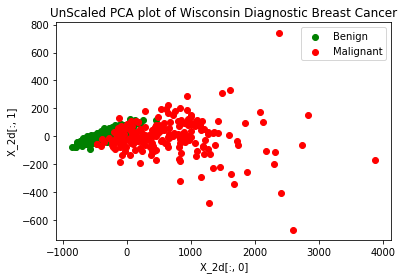

In [6]:
pca = PCA(n_components=2)
X= df.loc[:,'radius_mean':'fractal_dimension_worst']
Y=df.loc[:,'diagnosis']


X_2d=pca.fit_transform(X)
fig,ax = plt.subplots()
ax.scatter(X_2d[Y==0, 0], X_2d[Y==0, 1], color='g', label='Benign')
ax.scatter(X_2d[Y==1, 0], X_2d[Y==1, 1], color='r', label='Malignant')
ax.set(xlabel='X_2d[:, 0]', ylabel='X_2d[:, 1]',
       title='UnScaled PCA plot of Wisconsin Diagnostic Breast Cancer')
ax.legend()
plt.show()

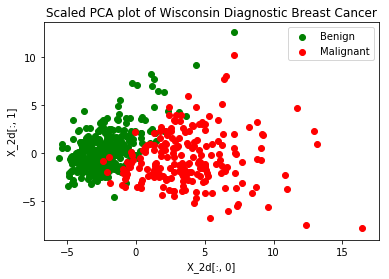

In [7]:

pca = PCA(n_components=2)
X= df.loc[:,'radius_mean':'fractal_dimension_worst']
Y=df.loc[:,'diagnosis']
#scale and then plot PCA
X_scaled = StandardScaler().fit_transform(X)

X_2d=pca.fit_transform(X_scaled)
fig,ax = plt.subplots()
ax.scatter(X_2d[Y==0, 0], X_2d[Y==0, 1], color='g', label='Benign')
ax.scatter(X_2d[Y==1, 0], X_2d[Y==1, 1], color='r', label='Malignant')
ax.set(xlabel='X_2d[:, 0]', ylabel='X_2d[:, 1]',
       title='Scaled PCA plot of Wisconsin Diagnostic Breast Cancer')
ax.legend()
plt.show()


### C. Train test split

In [8]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,random_state=50)
scaler_t = StandardScaler()
train_x_scaled = scaler_t.fit_transform(train_x)
test_x_scaled = scaler_t.transform(test_x)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(423, 30) (142, 30) (423,) (142,)


### D. Train models

- To pass the assessment, you should compare at least 3 types of models (there is no upper limit).
    - The model performance doesn't have to be the best possible, as long as you demonstrate how you compared them.
    - One of the models for comparison can be the DummyClassifier (if you choose to use it)

In [9]:
#Model :1 - Logistic Regression

logistic = LogisticRegression(random_state=99)
logistic.fit(train_x_scaled,train_y)
y_pred_logistic = logistic.predict(test_x_scaled)
y_pred_prob_logistic = logistic.predict(test_x_scaled)

y_pred_logistic


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [10]:
#Model:2 - SGDClassifier

sgd = SGDClassifier(tol=1e-4, max_iter=1000, verbose=True, random_state=42)
sgd.fit(train_x_scaled,train_y)
y_pred_sgd = sgd.predict(test_x_scaled)

-- Epoch 1
Norm: 84.07, NNZs: 30, Bias: -17.400497, T: 423, Avg. loss: 2.188957
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 79.84, NNZs: 30, Bias: -10.004236, T: 846, Avg. loss: 1.025195
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 71.82, NNZs: 30, Bias: -5.236208, T: 1269, Avg. loss: 0.482600
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 63.56, NNZs: 30, Bias: -5.477862, T: 1692, Avg. loss: 0.619244
Total training time: 0.00 seconds.
Convergence after 4 epochs took 0.00 seconds


In [11]:
#Model :3 - Naive Bayes
nb = GaussianNB()
nb.fit(train_x_scaled,train_y)
y_pred_nb = nb.predict(test_x_scaled)


In [12]:
#Dummy Classifier for baseline in ROC curve
baseline_dummy = DummyClassifier(random_state=259)
baseline_dummy.fit(train_x_scaled, train_y)


DummyClassifier(constant=None, random_state=259, strategy='stratified')

In [13]:
#Model 4 : K-Nearest Neighbours

kn = KNeighborsClassifier()
kn.fit(train_x_scaled, train_y)
y_pred_kn = kn.predict(test_x_scaled)

## Evaluation Metrics (20 points)

Determine which model you selected performs the best: [20 points]
  - use classification_report
  - use confusion_matrix
  - plot the roc_curve and compute the area under the curve (auc)
  - state which model is the best performing one and why

### A. Classification Report and Confusion Matrix

In [14]:
print("**************LOGISTIC REGRESSION CLASSIFICAION REPORT***************")

print(classification_report(test_y, y_pred_logistic))

print("**************SGD CLASSIFICAION REPORT******************")
print(classification_report(test_y, y_pred_sgd))

print("**************Naive Bayes CLASSIFICAION REPORT******************")
print(classification_report(test_y, y_pred_nb))

print("**************K-Nearest neighbours CLASSIFICAION REPORT******************")
print(classification_report(test_y, y_pred_kn))


**************LOGISTIC REGRESSION CLASSIFICAION REPORT***************
             precision    recall  f1-score   support

          0       0.96      0.99      0.97        90
          1       0.98      0.92      0.95        52

avg / total       0.97      0.96      0.96       142

**************SGD CLASSIFICAION REPORT******************
             precision    recall  f1-score   support

          0       0.96      0.99      0.97        90
          1       0.98      0.92      0.95        52

avg / total       0.97      0.96      0.96       142

**************Naive Bayes CLASSIFICAION REPORT******************
             precision    recall  f1-score   support

          0       0.94      0.93      0.94        90
          1       0.89      0.90      0.90        52

avg / total       0.92      0.92      0.92       142

**************K-Nearest neighbours CLASSIFICAION REPORT******************
             precision    recall  f1-score   support

          0       0.95      0.97   

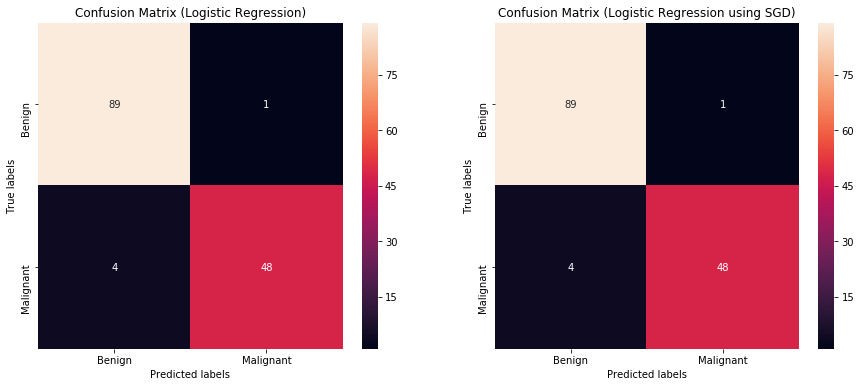

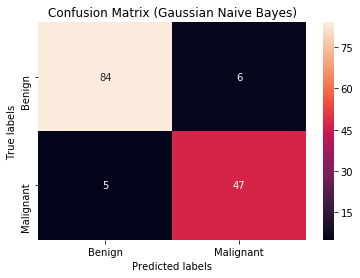

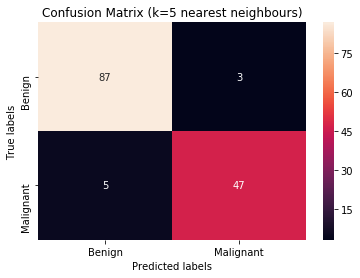

In [15]:
cm_logistic = confusion_matrix(test_y, y_pred_logistic)
cm_sgd = confusion_matrix(test_y, y_pred_sgd)
%matplotlib inline


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax = axes.flatten()

# annotate cells with ticks
sns.heatmap(cm_logistic, annot=True, ax=ax[0])
sns.heatmap(cm_sgd, annot=True, ax=ax[1])

ax[0].set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (Logistic Regression)') 
ax[0].xaxis.set_ticklabels(['Benign', 'Malignant'])
ax[0].yaxis.set_ticklabels(['Benign', 'Malignant'])

ax[1].set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (Logistic Regression using SGD)'); 
ax[1].xaxis.set_ticklabels(['Benign', 'Malignant'])
ax[1].yaxis.set_ticklabels(['Benign', 'Malignant'])
plt.show()

cm_nb = confusion_matrix(test_y, y_pred_nb)

fig, ax = plt.subplots()
sns.heatmap(cm_nb, annot=True, ax=ax)

ax.set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (Gaussian Naive Bayes)') 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])
plt.show()

cm_kn = confusion_matrix(test_y, y_pred_kn)

fig, ax = plt.subplots()
sns.heatmap(cm_kn, annot=True, ax=ax)

ax.set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (k=5 nearest neighbours)') 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])
plt.show()

###  B. ROC curve and Area under the ROC curve

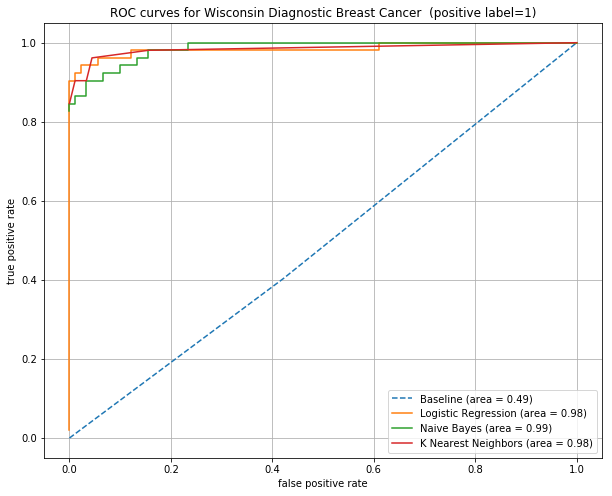

In [16]:
#Baseline for ROC curve
y_confidence_baseline = baseline_dummy.predict_proba(test_x_scaled)
fpr_baseline, tpr_baseline, _ = roc_curve(test_y, y_confidence_baseline[:, 1], pos_label=1)
auc_baseline = auc(fpr_baseline, tpr_baseline)

# Logistic Regression
y_confidence_logistic = logistic.predict_proba(test_x_scaled)
fpr_logistic, tpr_logistic, _ = roc_curve(test_y, y_confidence_logistic[:, 1], pos_label=1)
auc_logistic = auc(fpr_logistic, tpr_logistic)


# Naive Bayes
y_confidence_nb = nb.predict_proba(test_x_scaled)
fpr_nb, tpr_nb, _ = roc_curve(test_y, y_confidence_nb[:, 1], pos_label=1)
auc_nb = auc(fpr_nb, tpr_nb)

# K-Nearest Neighbours
y_confidence_knn = kn.predict_proba(test_x_scaled)
fpr_knn, tpr_knn, _ = roc_curve(test_y, y_confidence_knn[:, 1], pos_label=1)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROCs
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(fpr_baseline, tpr_baseline, label='Baseline (area = %0.2f)' % auc_baseline,
        linestyle='dashed')
ax.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (area = %0.2f)' % auc_logistic)
ax.plot(fpr_nb, tpr_nb, label='Naive Bayes (area = %0.2f)' % auc_nb)
ax.plot(fpr_knn, tpr_knn, label='K Nearest Neighbors (area = %0.2f)' % auc_knn)

# bigger area is better
ax.set(xlabel='false positive rate', ylabel='true positive rate',
       title='ROC curves for Wisconsin Diagnostic Breast Cancer  (positive label=1)')
ax.legend()
ax.grid()
plt.show()

In [17]:
'''
4 Models Logistic Regression, SGD and Naive Bayes have been used for this practice assessment.

Based on the F1 scores:
    Logistic Regression and SGD have Average F1 score of 0.96
    Naive Bayes has an average F1 score of 0.92.
    KNN has an average F1 score of 0.94
        
    As per F1 scores Logistic Regression and SGD have slightly higher F1 scores and hence are considered 
    better models than Naive Bayes & K-Nearest Neighbours.
    
ROC curve:
    Same is predicted in the ROC curve as well. Larger area under ROC better prediction.
    

'''

'\n4 Models Logistic Regression, SGD and Naive Bayes have been used for this practice assessment.\n\nBased on the F1 scores:\n    Logistic Regression and SGD have Average F1 score of 0.96\n    Naive Bayes has an average F1 score of 0.92.\n    KNN has an average F1 score of 0.94\n        \n    As per F1 scores Logistic Regression and SGD have slightly higher F1 scores and hence are considered \n    better models than Naive Bayes & K-Nearest Neighbours.\n    \nROC curve:\n    Same is predicted in the ROC curve as well. Larger area under ROC better prediction.\n    \n\n'

## Prediction (10 points)

Demonstrate how you will use the model in deployment [10 points]
  - Use data from prediction_data.csv
  - Get a prediction from your best model, print out the prediction (malignant or benign).

In [18]:
df_predict = pd.read_csv('C:/Users/thang/Documents/Thangamani/NUS/courseware/mldds-courseware/Assessment1/prediction_data.csv')

#print(df_predict.isnull().values.any())
#print(df_predict[df_predict.isnull().any(axis=1)])
#df_predict.dropna(inplace=True)


In [19]:
enc_diag_pred=LabelEncoder()
df_predict.diagnosis=enc_diag_pred.fit_transform(df_predict.diagnosis)

df_predict.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [20]:
# Prediction has been done for logistic regression & SGD models
#print(df_predict.head())
#print(df_predict.shape)
#X= df.loc[:,'radius_mean':'fractal_dimension_worst']
#Y=df.loc[:,'diagnosis']

test = df_predict.loc[:,'radius_mean':'fractal_dimension_worst']
truth = df_predict.loc[:,'diagnosis']

pred_lr = logistic.predict(test)
pred_sgd = sgd.predict(test)


print('Number of mislabeled points out of %d points:' % test.shape[0])
print('Logistic Regression: %d, Mean Accuracy: %.3f' % ((truth != pred_lr).sum(),
                                              logistic.score(test, truth)))
print('Logistic Regression (SGD): %d, Mean Accuracy: %.3f' % ((truth != pred_sgd).sum(),
                                                            sgd.score(test, truth)))

# print first 10 test datapoints and predictions
print()
print('Truth (1=malignant, 0=benign)', truth[:10])
print('Logistic Regression', pred_lr[:10])
print('Logistic Regression with SGD', pred_sgd[:10])


Number of mislabeled points out of 4 points:
Logistic Regression: 1, Mean Accuracy: 0.750
Logistic Regression (SGD): 1, Mean Accuracy: 0.750

Truth (1=malignant, 0=benign) 0    1
1    1
2    1
3    0
Name: diagnosis, dtype: int64
Logistic Regression [1 1 1 1]
Logistic Regression with SGD [1 1 1 1]


In [21]:
'''This complete code can either be deployed in Pickle or can be 
deployed as standalone python script for deployemnt into production'''

'This complete code can either be deployed in Pickle or can be \ndeployed as standalone python script for deployemnt into production'

In [22]:
logistic.export('logistic.pkl')

AttributeError: 'LogisticRegression' object has no attribute 'export'